In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/train_u6lujuX_CVtuZ9i.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.shape

(614, 13)

In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [ ]:
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
                       'Property_Area','Credit_History','Loan_Amount_Term']
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

for i in categorical_columns:
    df[i].fillna(df[i].mode()[0],inplace=True)

for i in numerical_columns:
    df[i].fillna(df[i].median(),inplace=True)

<ipython-input-70-4cfb703b00b8>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(df[i].mode()[0],inplace=True)
<ipython-input-70-4cfb703b00b8>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.

In [ ]:
df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [ ]:
df['Dependents'].replace('3+',4,inplace=True)#Replacing 3+ to 4
df['Dependents'].value_counts()

,count
Dependents,
0,360
1,102
2,101
4,51


In [ ]:
df.drop(['Loan_ID'],axis=1,inplace=True)

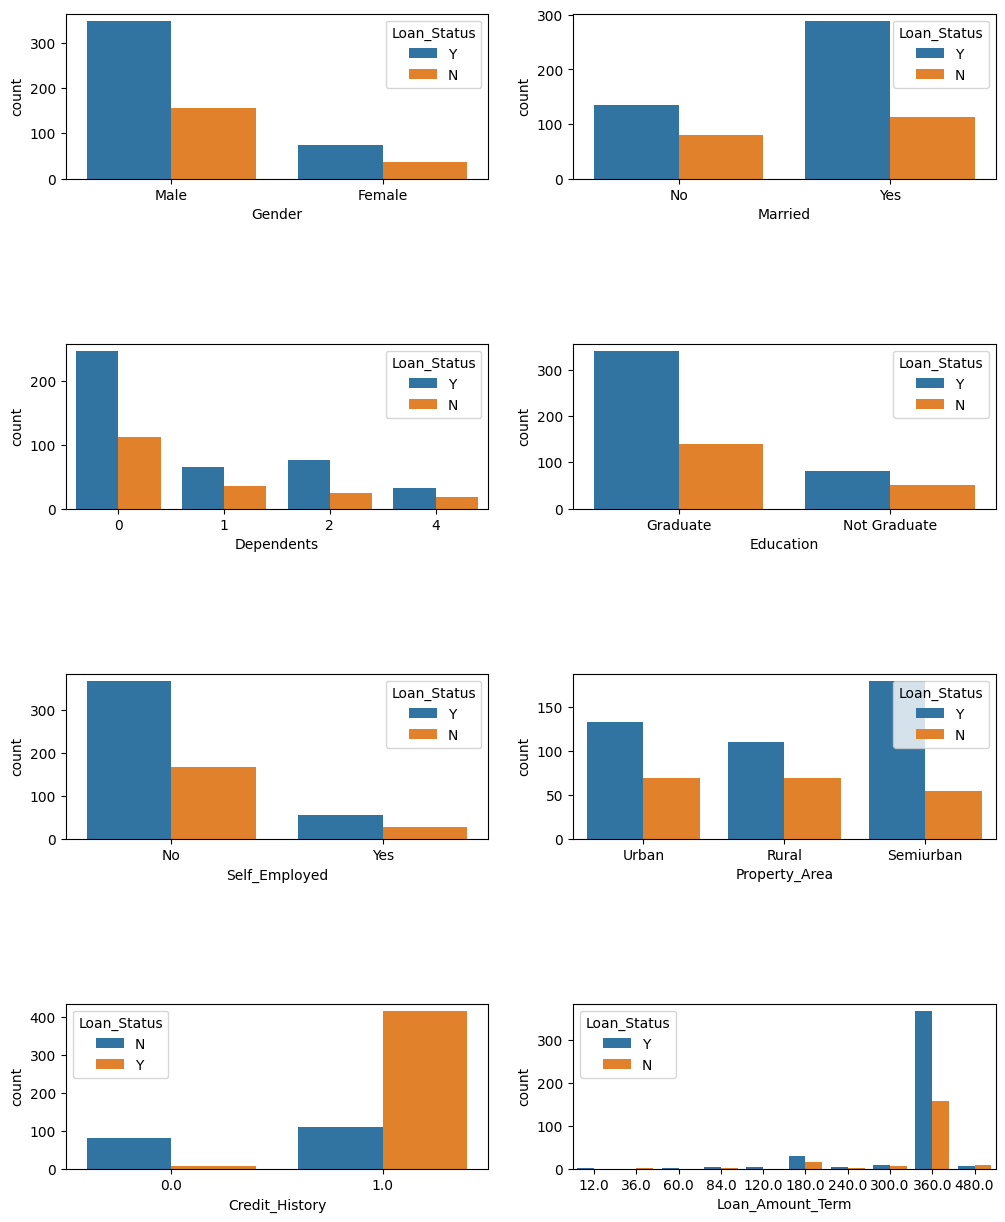

In [ ]:
fig,axes = plt.subplots(4,2,figsize=(12,15))
for idx,cat_col in enumerate(categorical_columns):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=df,hue='Loan_Status',ax=axes[row,col])

plt.subplots_adjust(hspace=1)

In [ ]:
obj_col = df.select_dtypes('object').columns
obj_col

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
binary_cols = [col for col in df.columns if df[col].dtype not in ["int64", "float64"] and df[col].nunique() == 2]
binary_cols

['Gender', 'Married', 'Education', 'Self_Employed', 'Loan_Status']

In [ ]:
le = LabelEncoder()
for col in binary_cols:
    df[col] = le.fit_transform(df[col])

In [ ]:
ohe_cols = [col for col in df.columns if 2 < df[col].nunique() < 10]
ohe_cols

['Dependents', 'Property_Area']

In [ ]:
df = pd.get_dummies(df, columns=ohe_cols, drop_first=True)

In [ ]:
for col in df.columns:
    if df[col].dtype == 'bool':  # Kiểm tra kiểu dữ liệu boolean
        df[col] = df[col].astype(int)

In [ ]:
df.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Dependents_0,Dependents_1,Dependents_2,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,0,5849,0.0,128.0,360.0,1.0,1,1,0,0,0,1
1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0,1,0,0,0
2,1,1,0,1,3000,0.0,66.0,360.0,1.0,1,1,0,0,0,1
3,1,1,1,0,2583,2358.0,120.0,360.0,1.0,1,1,0,0,0,1
4,1,0,0,0,6000,0.0,141.0,360.0,1.0,1,1,0,0,0,1


In [ ]:
def col_names(df):
    # Get categorical Variables
    cat_cols = [col for col in df.columns if df[col].dtypes not in ["int64", "float64"]]
    # Get numerical Variables
    num_cols = [col for col in df.columns if df[col].dtypes in ["int64", "float64"]]
    # Get Numerical but Categorical Variables
    num_but_cat = [col for col in num_cols if df[col].nunique() < 10]
    # Adding num_but_cat to cat_cols
    cat_cols = num_but_cat + cat_cols
    # num_but_cat removing from num_cols
    num_cols = [col for col in num_cols if col not in num_but_cat]
    print(f"Numerical Cols: {num_cols} \nCategorical Cols: {cat_cols} \nNumerical but Categorical: {num_but_cat}")
    return num_cols, cat_cols

In [ ]:
numerical_cols, categorical_cols = col_names(df)

Numerical Cols: ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'] 
Categorical Cols: ['Gender', 'Married', 'Education', 'Self_Employed', 'Credit_History', 'Loan_Status', 'Dependents_0', 'Dependents_1', 'Dependents_2', 'Property_Area_Semiurban', 'Property_Area_Urban'] 
Numerical but Categorical: ['Gender', 'Married', 'Education', 'Self_Employed', 'Credit_History', 'Loan_Status', 'Dependents_0', 'Dependents_1', 'Dependents_2', 'Property_Area_Semiurban', 'Property_Area_Urban']


In [ ]:
def replace_with_thresholds(df, col, low_threshold=0.25, up_threshold=0.75):
    q1 = df[col].quantile(low_threshold)
    q3 = df[col].quantile(up_threshold)
    interquartile = q3 - q1
    up_limit = q3 + 1.5 * interquartile
    low_limit = q1 - 1.5 * interquartile
    print(f"{col} - Low limit: {low_limit}, Up limit: {up_limit}")

    # Thay thế outlier
    df[col] = df[col].clip(lower=low_limit, upper=up_limit)


In [ ]:
def check_outliers(df, numerical_cols, iqr=1.5, low_threshold=0.25, up_threshold=0.75):
    outlier_cols = []
    for col in numerical_cols:
        q1 = df[col].quantile(low_threshold)
        q3 = df[col].quantile(up_threshold)
        interquantile = q3 - q1
        up_limit = q3 + iqr * interquantile
        low_limit = q1 - iqr * interquantile
        if df[(df[col] > up_limit) | (df[col] < low_limit)].any(axis=None):
            outlier_cols.append(col)
    if not outlier_cols:
        print("There is no outliers")
    return outlier_cols

In [ ]:
outlier_cols = check_outliers(df, numerical_cols)

In [ ]:
print(outlier_cols)

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']


ApplicantIncome - Low limit: -1498.75, Up limit: 10171.25


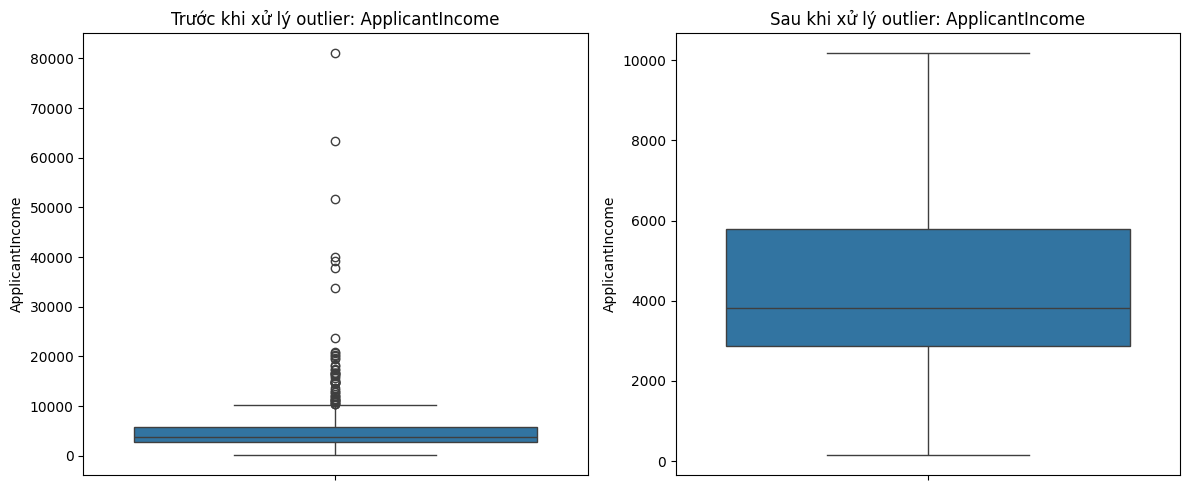

CoapplicantIncome - Low limit: -3445.875, Up limit: 5743.125


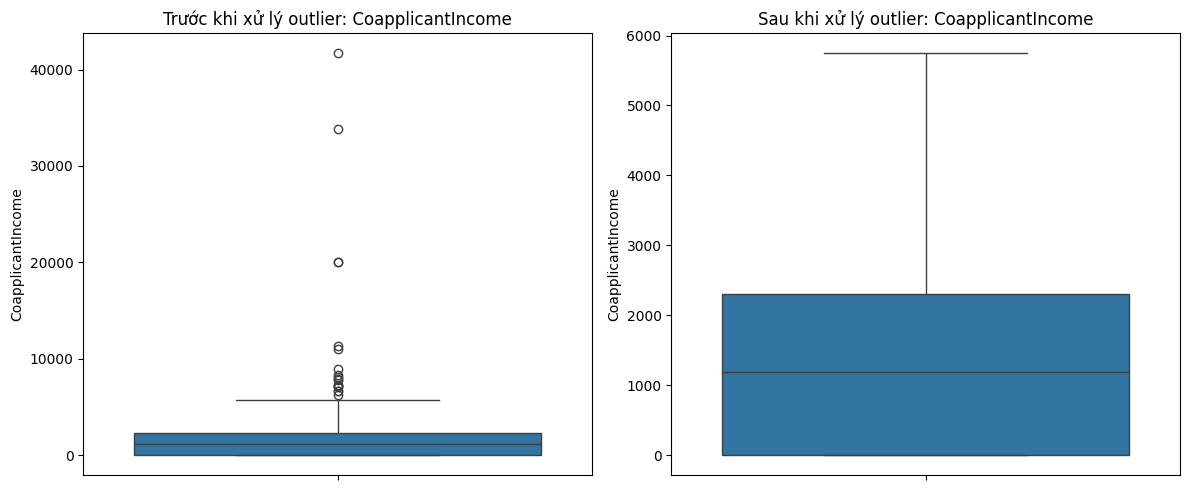

LoanAmount - Low limit: 3.5, Up limit: 261.5


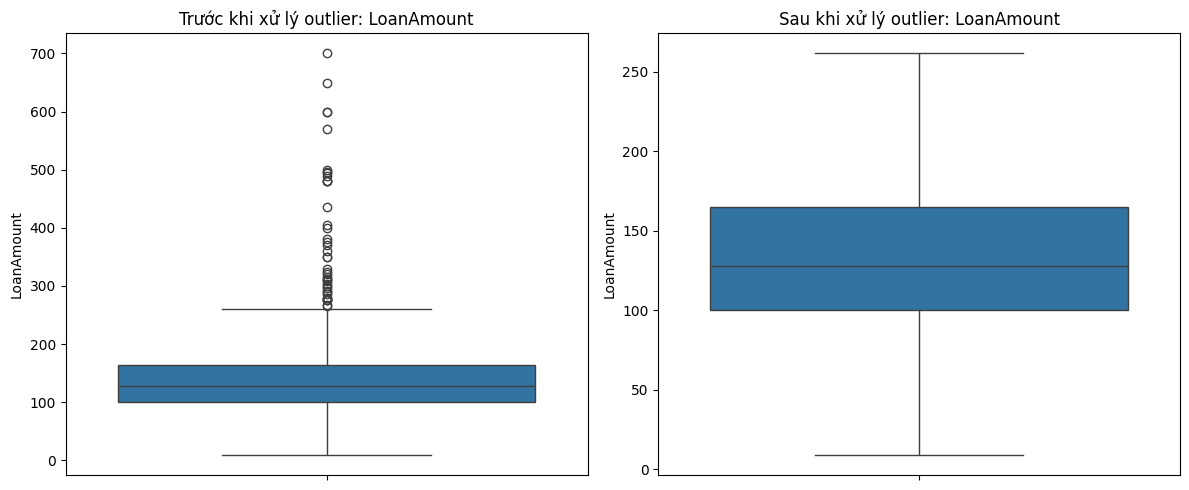

Loan_Amount_Term - Low limit: 360.0, Up limit: 360.0


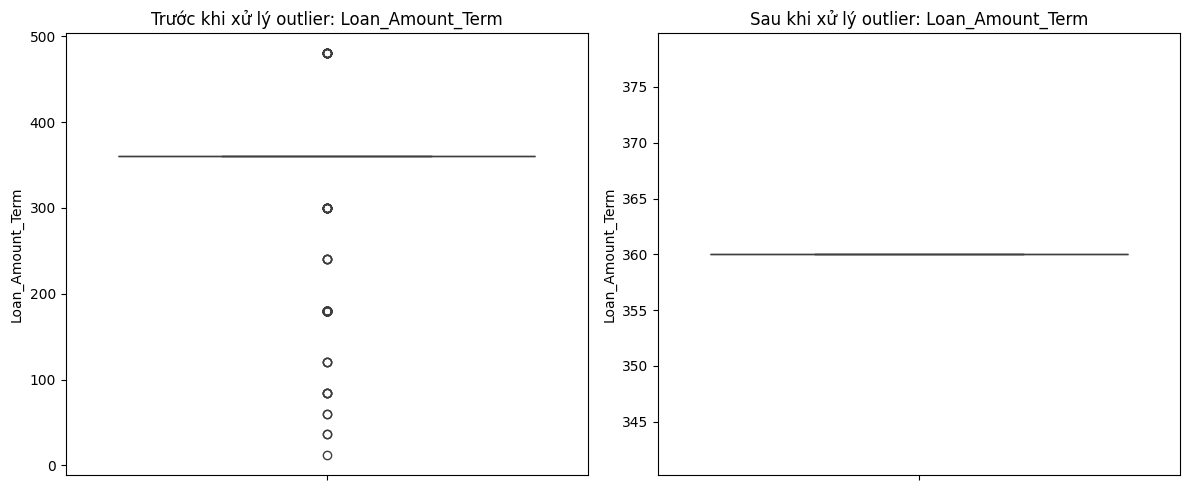

In [ ]:
for col in outlier_cols:
    # Vẽ boxplot trước khi xử lý
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    sns.boxplot(data=df[col], ax=axes[0])
    axes[0].set_title(f"Trước khi xử lý outlier: {col}")

    # Thay thế giá trị outliers
    replace_with_thresholds(df, col)

    # Vẽ boxplot sau khi xử lý
    sns.boxplot(data=df[col], ax=axes[1])
    axes[1].set_title(f"Sau khi xử lý outlier: {col}")

    plt.tight_layout()
    plt.show()

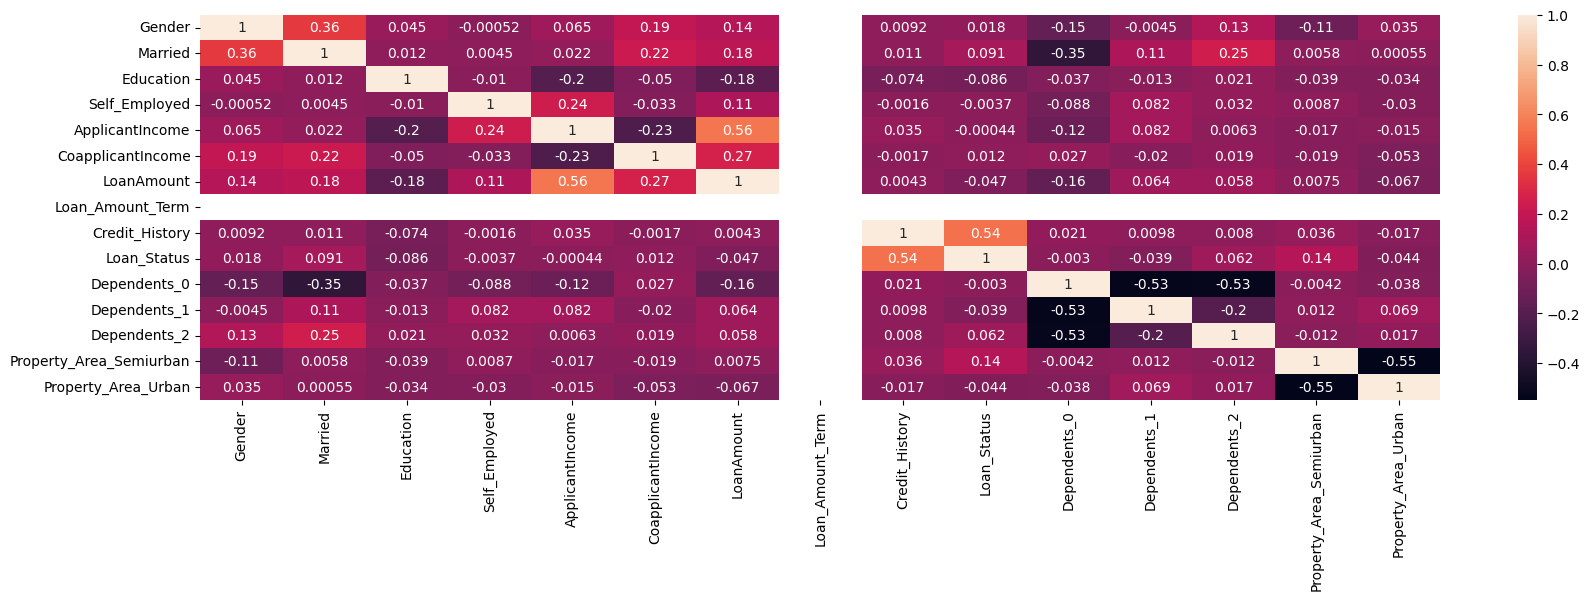

In [ ]:
plt.figure(figsize = (20,5))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [ ]:
ss = StandardScaler()
numerical_cols_to_scale = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

df[numerical_cols_to_scale] = ss.fit_transform(df[numerical_cols_to_scale])

In [ ]:
df.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Dependents_0,Dependents_1,Dependents_2,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,0,0.497164,-0.874587,-0.168041,0.0,1.0,1,1,0,0,0,1
1,1,1,0,0,-0.013767,0.054395,-0.168041,0.0,1.0,0,0,1,0,0,0
2,1,1,0,1,-0.652632,-0.874587,-1.280462,0.0,1.0,1,1,0,0,0,1
3,1,1,1,0,-0.820924,0.578025,-0.311579,0.0,1.0,1,1,0,0,0,1
4,1,0,0,0,0.558104,-0.874587,0.065209,0.0,1.0,1,1,0,0,0,1


In [ ]:
class_distribution = df['Loan_Status'].value_counts(normalize=True)

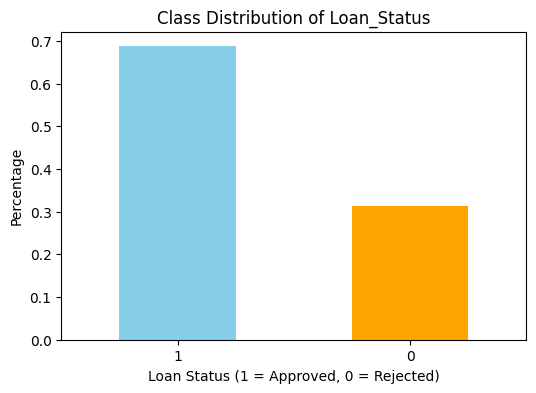

In [ ]:
plt.figure(figsize=(6, 4))
class_distribution.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Class Distribution of Loan_Status')
plt.xlabel('Loan Status (1 = Approved, 0 = Rejected)')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.show()

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

MessageError: Error: credential propagation was unsuccessful

In [ ]:
df.to_csv('/content/drive/MyDrive/DW_Final/preprocessed_data_finalversion.csv',index=False)